In [1]:
# Sample API
import flowx
import simulation

In [2]:
# Define grid parameters
nx, ny = 120, 40
xmin, xmax = -3.0, 12.5
ymin, ymax = -2.5, 2.5

# Define cell-centered variable names
center_vars = ["pres", "divv", "ibmf", "delp"]
face_vars = ["velc", "hvar"]

ins_vars = ["velc", "hvar", "divv", "pres", "delp"]
poisson_vars = ["delp", "divv"]
imbound_vars = ["ibmf", "velc"]

scalar_info = dict(tmax=10, dt=0.01, Re=100.0)

simulation_info = dict(
    time_stepping="ab2", poisson_solver="superlu", maxiter=2000, tol=1e-10, with_ib=True
)

particle_info = [dict(input="HDF5", file="sm_body.00001.h5", vel=[0.0, 0.0])]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(delp=["neumann", "neumann", "neumann", "neumann"])
bc_val_center = dict(delp=[0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc=["dirichlet", "outflow", "neumann", "neumann"])
bc_val_facex = dict(velc=[1.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc=["dirichlet", "dirichlet", "dirichlet", "dirichlet"])
bc_val_facey = dict(velc=[0.0, 0.0, 0.0, 0.0])

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.domain.Domain(
    nx,
    ny,
    xmin,
    xmax,
    ymin,
    ymax,
    center_vars,
    face_vars,
    scalar_info,
    particle_info,
    bc_type_center=bc_type_center,
    bc_val_center=bc_val_center,
    bc_type_facex=bc_type_facex,
    bc_val_facex=bc_val_facex,
    bc_type_facey=bc_type_facey,
    bc_val_facey=bc_val_facey,
)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson.Poisson(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound.ImBound(domain_data_struct, imbound_vars, simulation_info)

ins = flowx.ins.IncompNS(
    poisson, imbound, domain_data_struct, ins_vars, simulation_info
)

In [3]:
simulation.set_initial_velocity(gridc, gridx, gridy, "velc", "pres")

------------ Time = 0.01 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6704884214214763e-11
Total poisson time : 0.0007336139678955078
Total INS time : 0.001829385757446289
Max, Min, U   : 1.3812280947352322, 0.3406848629221704
Max, Min, V   : 0.4345986575190425, -0.4345986575190429
Max, Min, P   : 31.41926641256289, -20.162323821996857
Max, Min, DIV : 0.24050828836148597, -0.23199356150222172
Qin, Qout     : 5.0, 5.0


------------ Time = 0.02 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.191218126889107e-13
Total poisson time : 0.0005035400390625
Total INS time : 0.002272367477416992
Max, Min, U   : 1.7689133559992503, -0.17357127419952878
Max, Min, V   : 0.8833031003577995, -0.8833031003577996
Max, Min, P   : 31.73532838594124, -21.2405690789373
Max, Min, DIV : 0.1323225374788244, -0.21423410975963764
Qin, Qout     : 5.0, 5.0


------------ Time = 0.03 ---------------
Number of poisson iterations    : None
Final

Final poisson residual : 1.998635067850996e-15
Total poisson time : 0.0005002021789550781
Total INS time : 0.0014967918395996094
Max, Min, U   : 1.5328000930933103, -0.0959610141244052
Max, Min, V   : 1.0541506516881516, -1.0541506516881518
Max, Min, P   : -4.207367962892162, -6.356351171301777
Max, Min, DIV : 0.0001510856931534743, -0.00016734069138530944
Qin, Qout     : 5.0, 5.0


------------ Time = 0.8900000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3730766640275394e-15
Total poisson time : 0.0004863739013671875
Total INS time : 0.002071857452392578
Max, Min, U   : 1.5314707238206917, -0.09866022379976899
Max, Min, V   : 1.0533901173728408, -1.0533901173728408
Max, Min, P   : -4.208297917474281, -6.35467375423566
Max, Min, DIV : 0.00014999396956938416, -0.00017006756505831642
Qin, Qout     : 5.0, 5.0


------------ Time = 0.9000000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.612989448129

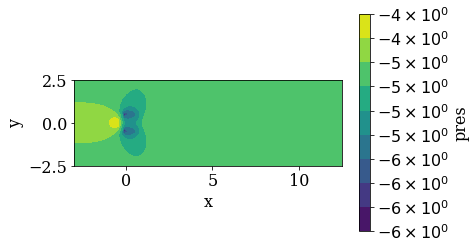

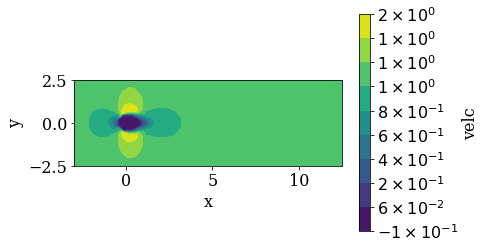

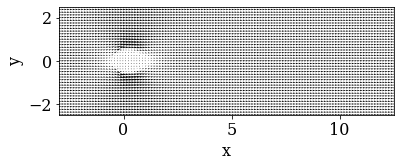

------------ Time = 1.0100000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.708350724204643e-14
Total poisson time : 0.0007162094116210938
Total INS time : 0.0029897689819335938
Max, Min, U   : 1.5376894337250964, -0.12727393346821347
Max, Min, V   : 1.044561341210339, -1.0445613412103392
Max, Min, P   : -4.113031364348526, -6.2310654524568845
Max, Min, DIV : 0.00012366653758477675, -0.0001639579834559657
Qin, Qout     : 5.0, 5.0


------------ Time = 1.0200000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.693270235972532e-15
Total poisson time : 0.0005106925964355469
Total INS time : 0.0021698474884033203
Max, Min, U   : 1.537870054374511, -0.1293288680482127
Max, Min, V   : 1.0438729592333886, -1.0438729592333886
Max, Min, P   : -4.116560036667753, -6.232360920702129
Max, Min, DIV : 0.00012045325848264454, -0.00016219022920658773
Qin, Qout     : 5.0, 5.0


------------ Time = 1.0300000000000007 

------------ Time = 1.9200000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.334553563244324e-13
Total poisson time : 0.0013689994812011719
Total INS time : 0.0028765201568603516
Max, Min, U   : 1.486875849008578, -0.3709801487857947
Max, Min, V   : 1.0028605716102197, -1.00286057161022
Max, Min, P   : -5.847665785966027, -7.8278859587835985
Max, Min, DIV : 2.528852271699842e-05, -1.377670441254919e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 1.9300000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7820446369784738e-13
Total poisson time : 0.0004887580871582031
Total INS time : 0.0014965534210205078
Max, Min, U   : 1.486510066438051, -0.372122671102761
Max, Min, V   : 1.0026008759321283, -1.0026008759321283
Max, Min, P   : -5.917640666996545, -7.897011774854261
Max, Min, DIV : 2.497630278110196e-05, -1.3799444659512439e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 1.9400000000000015 -----

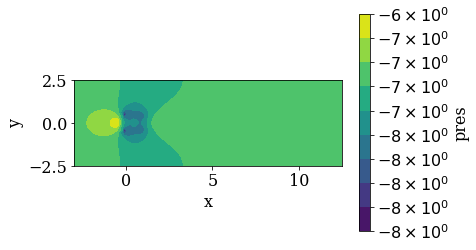

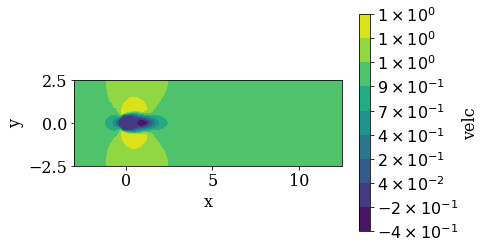

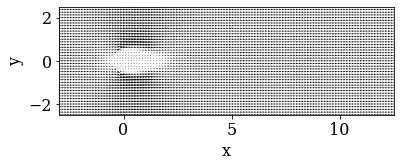

------------ Time = 2.010000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.139493234332796e-13
Total poisson time : 0.0007112026214599609
Total INS time : 0.0020177364349365234
Max, Min, U   : 1.4839437293611717, -0.37964692564474595
Max, Min, V   : 1.0006398585235567, -1.0006398585235567
Max, Min, P   : -6.485121615587698, -8.458085076228288
Max, Min, DIV : 2.2625331723319353e-05, -1.3693419892879533e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 2.020000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1278775545693637e-13
Total poisson time : 0.0005164146423339844
Total INS time : 0.0021903514862060547
Max, Min, U   : 1.4836676704741922, -0.38039971204778145
Max, Min, V   : 1.0004082944510633, -1.000408294451063
Max, Min, P   : -6.533127884487816, -8.505336716079832
Max, Min, DIV : 2.2351183243085517e-05, -1.3647233880753618e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 2.0300000000000007

------------ Time = 2.9299999999999815 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1133779267462643e-13
Total poisson time : 0.000492095947265625
Total INS time : 0.002922534942626953
Max, Min, U   : 1.4710268273959104, -0.44331852149552703
Max, Min, V   : 0.9874070538238733, -0.9874070538238735
Max, Min, P   : -10.519029475243283, -12.442861611460701
Max, Min, DIV : 1.1011804930871177e-05, -7.1053774066687225e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 2.9399999999999813 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8992225461752254e-13
Total poisson time : 0.00048732757568359375
Total INS time : 0.0020296573638916016
Max, Min, U   : 1.470904585394906, -0.44362966036618795
Max, Min, V   : 0.987287135517753, -0.9872871355177532
Max, Min, P   : -10.594441366212047, -12.517785249360191
Max, Min, DIV : 1.1042004817516239e-05, -7.058175887059148e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 2.949999999999

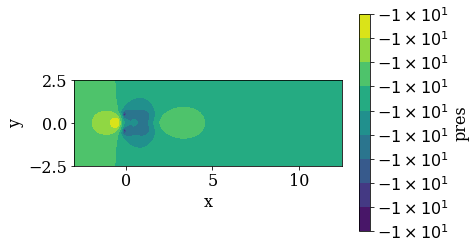

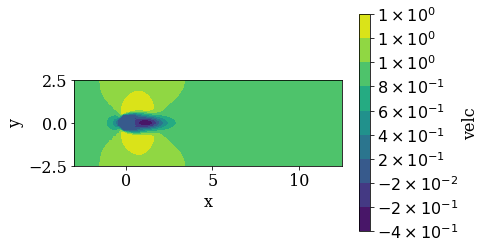

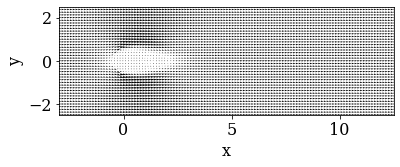

------------ Time = 3.00999999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.629483018676989e-13
Total poisson time : 0.0006940364837646484
Total INS time : 0.0019872188568115234
Max, Min, U   : 1.4700130040066206, -0.44534568259646246
Max, Min, V   : 0.9864254688009216, -0.9864254688009215
Max, Min, P   : -11.388362193866534, -13.308261111626347
Max, Min, DIV : 1.128547796509636e-05, -6.710938050130677e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 3.0199999999999796 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.225053475292636e-13
Total poisson time : 0.0005536079406738281
Total INS time : 0.0016787052154541016
Max, Min, U   : 1.469879582625162, -0.4455285702979989
Max, Min, V   : 0.9862991603893787, -0.9862991603893786
Max, Min, P   : -11.481080809800902, -13.40048412215215
Max, Min, DIV : 1.1323879491740652e-05, -6.659213826004651e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 3.0299999999999794 -

------------ Time = 3.899999999999961 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2069714851578237e-13
Total poisson time : 0.0013282299041748047
Total INS time : 0.0025708675384521484
Max, Min, U   : 1.4551197800178786, -0.4466250194098981
Max, Min, V   : 0.9742867451122558, -0.9742867451122553
Max, Min, P   : -9.655608807949195, -11.535690927502483
Max, Min, DIV : 9.630437261930603e-06, -3.9877092878426465e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 3.9099999999999606 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.394098610464721e-13
Total poisson time : 0.0004887580871582031
Total INS time : 0.0015528202056884766
Max, Min, U   : 1.454995147287068, -0.4464183933926378
Max, Min, V   : 0.9741737581997681, -0.9741737581997678
Max, Min, P   : -9.593417834177568, -11.47316083387685
Max, Min, DIV : 9.555081783062431e-06, -3.957120855636801e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 3.9199999999999604 --

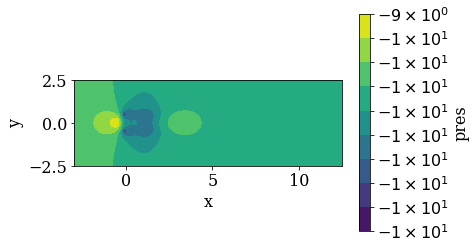

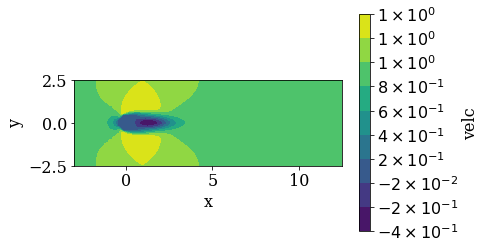

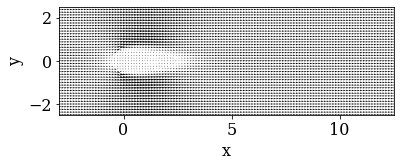

------------ Time = 4.009999999999959 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.494355006383552e-14
Total poisson time : 0.0007035732269287109
Total INS time : 0.0021178722381591797
Max, Min, U   : 1.4538307549808323, -0.4440382552982923
Max, Min, V   : 0.9730954549282785, -0.9730954549282783
Max, Min, P   : -9.50356930844207, -11.380052673423487
Max, Min, DIV : 8.827613583412664e-06, -3.660334993486349e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 4.019999999999959 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.29328396728906e-14
Total poisson time : 0.0005135536193847656
Total INS time : 0.0021276473999023438
Max, Min, U   : 1.4537217828527078, -0.44377079326718855
Max, Min, V   : 0.972992602339838, -0.9729926023398376
Max, Min, P   : -9.51264541018544, -11.388815224159478
Max, Min, DIV : 8.758450511344416e-06, -3.6319643631469616e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 4.0299999999999585 -----

------------ Time = 4.869999999999941 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.7539137393464783e-13
Total poisson time : 0.00048351287841796875
Total INS time : 0.001692056655883789
Max, Min, U   : 1.446382582643809, -0.42986954328159793
Max, Min, V   : 0.9663240451862454, -0.9663240451862454
Max, Min, P   : -16.99310097763177, -18.848144070700645
Max, Min, DIV : 5.387210513578474e-06, -2.22512135054791e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 4.87999999999994 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.8265176963375e-13
Total poisson time : 0.00048232078552246094
Total INS time : 0.0015392303466796875
Max, Min, U   : 1.4463104086869727, -0.42975799189201025
Max, Min, V   : 0.9662620591544248, -0.9662620591544245
Max, Min, P   : -16.836482991416528, -18.6913288789024
Max, Min, DIV : 5.359653126648902e-06, -2.213728037889456e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 4.88999999999994 -------

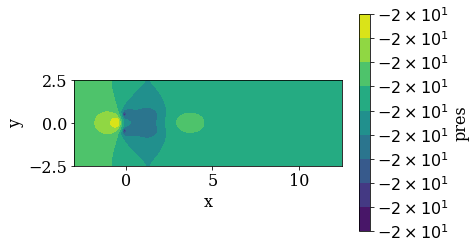

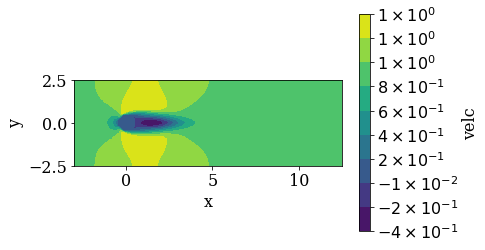

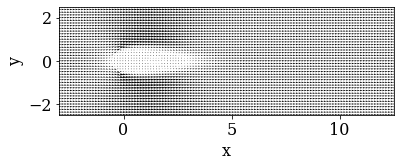

------------ Time = 5.009999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8720083198816517e-13
Total poisson time : 0.0006923675537109375
Total INS time : 0.0020246505737304688
Max, Min, U   : 1.445411298348148, -0.42794403215941146
Max, Min, V   : 0.9654845109949994, -0.9654845109949992
Max, Min, P   : -15.18479935890917, -17.037173389119854
Max, Min, DIV : 5.009041474770564e-06, -2.069232552896641e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 5.019999999999937 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8051736502512883e-13
Total poisson time : 0.0005159378051757812
Total INS time : 0.0015285015106201172
Max, Min, U   : 1.4453451313663446, -0.42777826855772677
Max, Min, V   : 0.965426834336544, -0.9654268343365436
Max, Min, P   : -15.113290708010615, -16.96548143994427
Max, Min, DIV : 4.982804369658297e-06, -2.0584468321332714e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 5.029999999999937 -

------------ Time = 5.83999999999992 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.886631235004289e-14
Total poisson time : 0.001308441162109375
Total INS time : 0.002323150634765625
Max, Min, U   : 1.4409368007883268, -0.40950979145903127
Max, Min, V   : 0.9615532367644484, -0.9615532367644479
Max, Min, P   : -14.4339445478938, -16.273807456108212
Max, Min, DIV : 3.3156238570932004e-06, -1.3718053249129003e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 5.84999999999992 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.372723946171539e-14
Total poisson time : 0.0005004405975341797
Total INS time : 0.0015783309936523438
Max, Min, U   : 1.4408925130228596, -0.40930771479217626
Max, Min, V   : 0.9615147246691768, -0.9615147246691764
Max, Min, P   : -14.419113315148858, -16.258853990399196
Max, Min, DIV : 3.2996984676430814e-06, -1.3652285565458356e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 5.8599999999999195 -

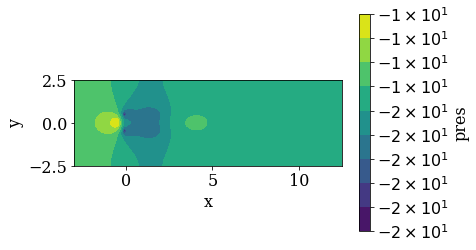

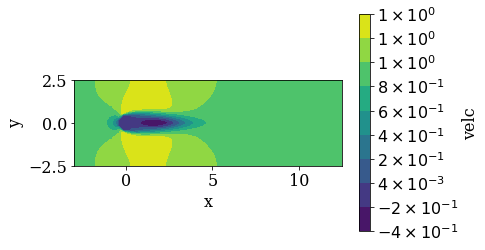

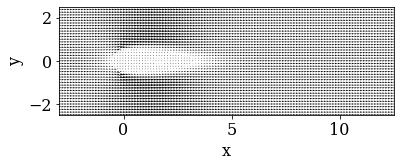

------------ Time = 6.009999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.84125970119089e-13
Total poisson time : 0.0008006095886230469
Total INS time : 0.0024247169494628906
Max, Min, U   : 1.4402122874604897, -0.4057830604034406
Max, Min, V   : 0.9609224926685475, -0.9609224926685472
Max, Min, P   : -14.492687470083258, -16.330550712393205
Max, Min, DIV : 3.0547714279471715e-06, -1.2642509498058982e-06
Qin, Qout     : 5.0, 4.999999999999999


------------ Time = 6.019999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.175021323327947e-13
Total poisson time : 0.0005624294281005859
Total INS time : 0.002472400665283203
Max, Min, U   : 1.440171507271143, -0.4055456941273019
Max, Min, V   : 0.9608869349646377, -0.9608869349646376
Max, Min, P   : -14.625693561823088, -16.463444218874525
Max, Min, DIV : 3.0400767594727316e-06, -1.258202080112359e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 6.0299

------------ Time = 6.839999999999899 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0525270895553045e-13
Total poisson time : 0.001306295394897461
Total INS time : 0.002384662628173828
Max, Min, U   : 1.4374044578259229, -0.38626446069322395
Max, Min, V   : 0.9584765668707709, -0.9584765668707705
Max, Min, P   : -11.90086255503483, -13.73102539723247
Max, Min, DIV : 2.0381692928033915e-06, -8.455246601352067e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 6.849999999999898 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.567590396138148e-14
Total poisson time : 0.00048470497131347656
Total INS time : 0.001699686050415039
Max, Min, U   : 1.4373769909987044, -0.38602288966894516
Max, Min, V   : 0.9584526825587795, -0.9584526825587791
Max, Min, P   : -11.89009504503837, -13.72018317484532
Max, Min, DIV : 2.027924811831939e-06, -8.41297046914663e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 6.859999999999898 -----

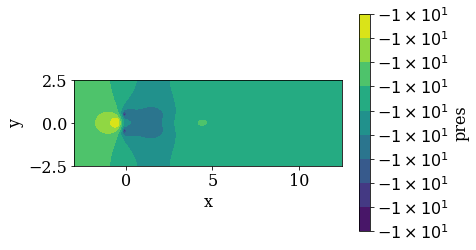

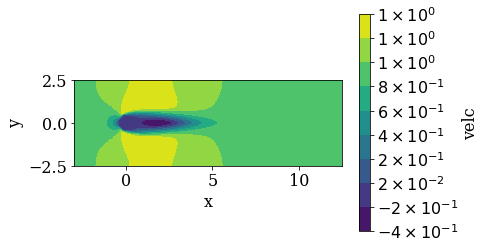

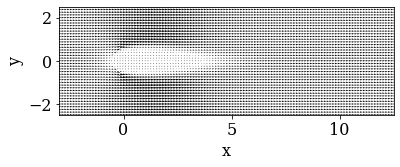

------------ Time = 7.009999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0601227664704476e-13
Total poisson time : 0.0006916522979736328
Total INS time : 0.0020134449005126953
Max, Min, U   : 1.4369561270077147, -0.38197977683086415
Max, Min, V   : 0.9580864037950401, -0.9580864037950397
Max, Min, P   : -12.006125536943697, -13.835068780712758
Max, Min, DIV : 1.8698300027387039e-06, -7.76043933893047e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 7.019999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5583846984359956e-13
Total poisson time : 0.000514984130859375
Total INS time : 0.002306699752807617
Max, Min, U   : 1.43693095482738, -0.38171664281931456
Max, Min, V   : 0.9580644784263259, -0.9580644784263256
Max, Min, P   : -12.0720848318566, -13.900959589262849
Max, Min, DIV : 1.8603148445051483e-06, -7.72115466482108e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 7.0299999999998946 ---

------------ Time = 7.899999999999876 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.398219025036048e-13
Total poisson time : 0.0004892349243164062
Total INS time : 0.0026776790618896484
Max, Min, U   : 1.4351531037867933, -0.3605528955099002
Max, Min, V   : 0.956514934985435, -0.9565149349854349
Max, Min, P   : -15.320046037840104, -17.144092487251136
Max, Min, DIV : 1.1791821202011322e-06, -5.71609005142748e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 7.909999999999876 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.518487161513395e-13
Total poisson time : 0.00048160552978515625
Total INS time : 0.00177764892578125
Max, Min, U   : 1.4351371743780519, -0.36029131959700034
Max, Min, V   : 0.9565010586587411, -0.956501058658741
Max, Min, P   : -15.210239595400791, -17.03424295058914
Max, Min, DIV : 1.1729953990494663e-06, -5.702183629441304e-07
Qin, Qout     : 5.0, 5.000000000000001


------------ Time = 7.919999

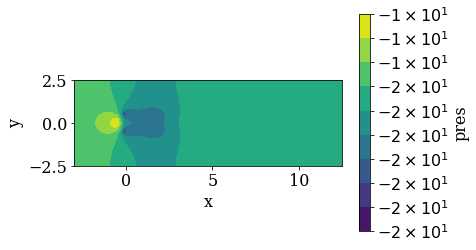

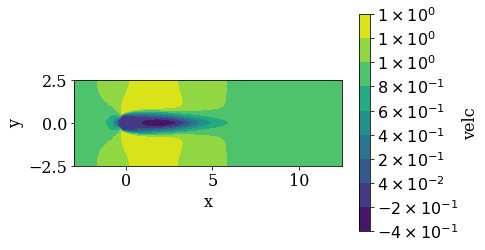

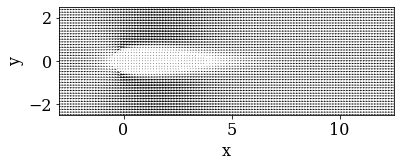

------------ Time = 8.009999999999874 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0142410588073712e-13
Total poisson time : 0.0006856918334960938
Total INS time : 0.0020563602447509766
Max, Min, U   : 1.4349823612674555, -0.35763453942659806
Max, Min, V   : 0.9563662091872802, -0.95636620918728
Max, Min, P   : -14.345485465193686, -16.1690702288337
Max, Min, DIV : 1.1127305898619901e-06, -5.564033595528706e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 8.019999999999873 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.076614018327386e-13
Total poisson time : 0.0005185604095458984
Total INS time : 0.002191781997680664
Max, Min, U   : 1.4349673197970307, -0.3573649678008152
Max, Min, V   : 0.9563531082834394, -0.9563531082834392
Max, Min, P   : -14.259833167224611, -16.083377283456084
Max, Min, DIV : 1.1068609524740057e-06, -5.550297976358864e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 8.029999999999873 ---

Number of poisson iterations    : None
Final poisson residual : 4.194314659960334e-13
Total poisson time : 0.0004916191101074219
Total INS time : 0.0015189647674560547
Max, Min, U   : 1.4339805809947843, -0.337915373297818
Max, Min, V   : 0.9554933629423797, -0.95549336294238
Max, Min, P   : -9.675820091554238, -11.496706218296792
Max, Min, DIV : 7.13609547061234e-07, -4.539230822747653e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 8.839999999999856 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.331505830021494e-13
Total poisson time : 0.0004932880401611328
Total INS time : 0.0016291141510009766
Max, Min, U   : 1.4339709086142, -0.3376596110127836
Max, Min, V   : 0.9554849294834493, -0.9554849294834495
Max, Min, P   : -9.495636155785661, -11.316496324930824
Max, Min, DIV : 7.096515254027502e-07, -4.528306692813677e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 8.849999999999856 ---------------
Number of poisson iterations    : None
Final pois

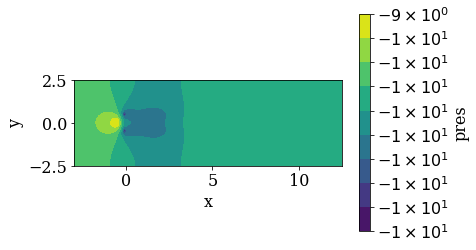

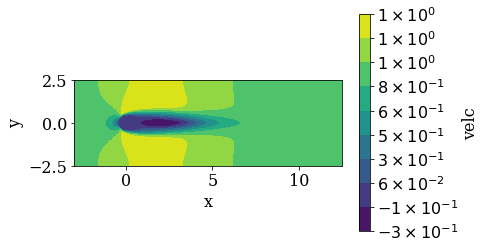

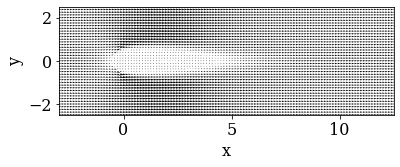

------------ Time = 9.009999999999852 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5708522153188184e-13
Total poisson time : 0.000698089599609375
Total INS time : 0.002032756805419922
Max, Min, U   : 1.4338144229221141, -0.33324783326992397
Max, Min, V   : 0.9553484819679785, -0.9553484819679787
Max, Min, P   : -9.5885281318234, -11.408968750013424
Max, Min, DIV : 6.452173726798855e-07, -4.3420421344531057e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 9.019999999999852 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.662331445543365e-13
Total poisson time : 0.0005116462707519531
Total INS time : 0.0020313262939453125
Max, Min, U   : 1.4338056713644005, -0.33298496968507846
Max, Min, V   : 0.9553408506412177, -0.9553408506412177
Max, Min, P   : -9.703295299611382, -11.523712478002373
Max, Min, DIV : 6.415896361118507e-07, -4.3310523029777004e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 9.029999999999852 ---

Max, Min, P   : -9.443313999269776, -11.262138779717143
Max, Min, DIV : 4.47203908987559e-07, -3.540976216548364e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 9.899999999999833 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.79950070118947e-14
Total poisson time : 0.0005042552947998047
Total INS time : 0.0019366741180419922
Max, Min, U   : 1.4332033443890406, -0.3119159575906608
Max, Min, V   : 0.9548150704980994, -0.9548150704980993
Max, Min, P   : -9.408647977557417, -11.227458894123723
Max, Min, DIV : 4.4607896720894047e-07, -3.5333120805558504e-07
Qin, Qout     : 5.0, 5.0


------------ Time = 9.909999999999833 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.870940032314262e-14
Total poisson time : 0.0004923343658447266
Total INS time : 0.0015306472778320312
Max, Min, U   : 1.4331981497534114, -0.3116702927773744
Max, Min, V   : 0.954810528570619, -0.954810528570619
Max, Min, P   : -9.3888804694597, -11.207677

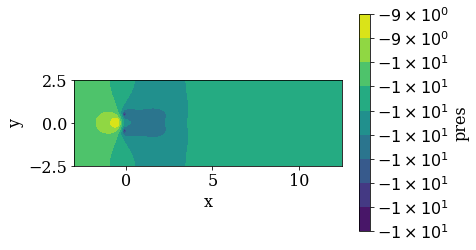

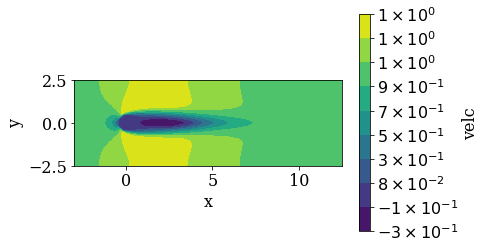

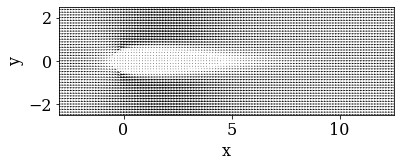

------------ Time = 10.009999999999831 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.065606614473093e-14
Total poisson time : 0.0007791519165039062
Total INS time : 0.002133607864379883
Max, Min, U   : 1.4331479278859929, -0.30920703448442394
Max, Min, V   : 0.9547666079107243, -0.9547666079107242
Max, Min, P   : -9.291793901766765, -11.110457936721119
Max, Min, DIV : 4.3350528627916773e-07, -3.44806073693249e-07
Qin, Qout     : 5.0, 5.0




In [4]:
imbound.map_to_grid()

while scalars.time <= scalars.tmax:

    ins.advance()
    scalars.advance()

    # Display stats
    if scalars.nstep % 1 == 0:
        flowx.io.display_stats(scalars)

    if scalars.nstep % 100 == 0:
        flowx.io.plot_contour(gridc, "pres")
        flowx.io.plot_contour(gridx, "velc")
        flowx.io.plot_vector(gridx, gridy, "velc")

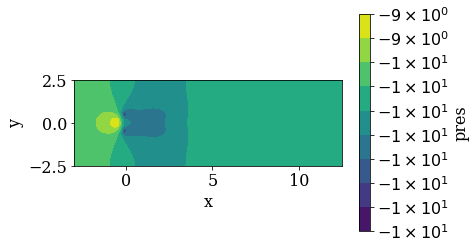

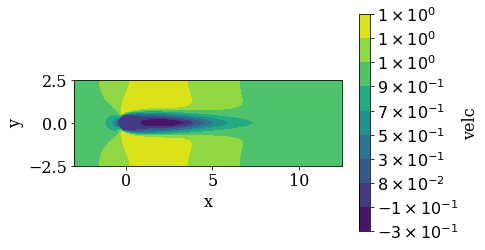

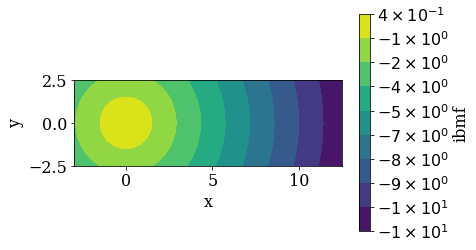

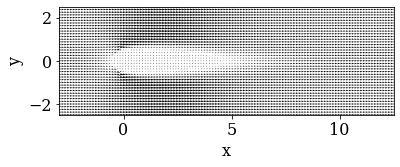

In [5]:
flowx.io.plot_contour(gridc, "pres")
flowx.io.plot_contour(gridx, "velc")
flowx.io.plot_contour(gridc, "ibmf")
flowx.io.plot_vector(gridx, gridy, "velc")